
## **Data Cleaning**


---
Data Cleaning is the process of transforming raw data into consistent data that can be analyzed. It is aimed at improving the content of statistical statements based on the data as well as their reliability. Data cleaning may profoundly influence the statistical statements based on the data.

**About the the Data set**

> The dataset used in this analysis is the "College Wage Premium" dataset, which provides information about the wages of college graduates compared to non-college graduates. The dataset was sourced from the following link:
[https://github.com/waheeb123/Datasets/blob/main/college_wage_premium.csv](URL)


This dataset was chosen for analysis because it is relevant to studying the economic impact of education and can provide insights into how wages differ between college-educated and non-college-educated individuals.

The Data set choosen for the data cleaning task is downloaded from Kaggle. Kaggle is an online community platform for data scientists and machine learning enthusiasts. Kaggle allows users to collaborate with other users, find and publish datasets, use GPU integrated notebooks, and compete with other data scientists to solve data science challenges.

After dowloading the data set, it was stored in a github repository from where it was loaded into notebook.




In [1]:
# Setting up the enviromnet

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
# Loading the data set

df = pd.read_csv("https://raw.githubusercontent.com/waheeb123/Datasets/main/college_wage_premium.csv")

# Displaying first 7 and last 7 rows

df.head(7)


,year,high_school,bachelors_degree,men_high_school,men_bachelors_degree,women_high_school,women_bachelors_degree
0,2022,21.94,41.60,24.08,49.01,18.93,34.39
1,2021,22.28,41.32,24.36,47.83,19.36,35.08
2,2020,22.70,41.65,25.09,48.15,19.35,35.41
3,2019,21.64,39.61,23.99,45.74,18.48,33.80
4,2018,21.50,38.87,23.72,44.97,18.49,33.03
5,2017,21.26,38.65,23.47,44.50,18.31,33.01
6,2016,21.00,38.73,23.01,44.98,18.33,32.66


## **Summary statistics and structure:**

we can check the mean, standard deviation, counts , min/max and quantiles with the help of `describe()` function for all the columns with numeric data type. BUt median is missing so we can get median by `.median()` method in the code cell below

In [4]:
df.describe()

,year,high_school,bachelors_degree,men_high_school,men_bachelors_degree,women_high_school,women_bachelors_degree
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1997.50000,20.876600,34.768600,23.832600,39.988400,17.571600,28.926400
std,14.57738,0.742743,3.306645,1.225697,3.734945,0.854342,3.760532
min,1973.00000,19.620000,30.040000,22.110000,35.160000,16.450000,22.940000
25%,1985.25000,20.392500,31.875000,22.945000,36.605000,16.890000,25.462500
50%,1997.50000,20.855000,34.205000,23.695000,39.485000,17.370000,29.425000
75%,2009.75000,21.480000,37.122500,24.307500,42.340000,18.317500,31.975000
max,2022.00000,22.700000,41.650000,26.900000,49.010000,19.360000,35.410000


In [5]:
df.median()

year                      1997.500
high_school                 20.855
bachelors_degree            34.205
men_high_school             23.695
men_bachelors_degree        39.485
women_high_school           17.370
women_bachelors_degree      29.425
dtype: float64

In [6]:
#Checking the data types of column and shape

print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    50 non-null     int64  
 1   high_school             50 non-null     float64
 2   bachelors_degree        50 non-null     float64
 3   men_high_school         50 non-null     float64
 4   men_bachelors_degree    50 non-null     float64
 5   women_high_school       50 non-null     float64
 6   women_bachelors_degree  50 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 2.9 KB
None
(50, 7)


## **Changing the column name:**
The column names look perfectly fine and meaningful.  

**Note:** For the sake of this assignment we will change a few names for the columns at the end of notebook. For now we will leave as it is

In [7]:
#Checking column name:

df.columns

Index(['year', 'high_school', 'bachelors_degree', 'men_high_school',
       'men_bachelors_degree', 'women_high_school', 'women_bachelors_degree'],
      dtype='object')

## **Handling missing data:**
Let's create a list of columns that contains the missing values

In [19]:
# Missing Value Information
missing_info = df.isnull().sum()
print (missing_info)

year                      0
high_school               0
bachelors_degree          0
men_high_school           0
men_bachelors_degree      0
women_high_school         0
women_bachelors_degree    0
dtype: int64


In [20]:
# Saving the columns that has missing values
cols_with_missing = [col for col in df.columns
                     if df[col].isnull().any()]

In [21]:
# Printing the names of columns and number of missing values in that column
for i in cols_with_missing:
    print(i,df[i].isnull().sum())

We can see that there are no missing values.

In [23]:
# Checking the shape of data frame after removing the missing values if there are some
df.shape

(50, 7)

## **Data Wrangling**



In [36]:
# Modify column names

new_column_names = [
    "Year", "HighSchool_Wages", "Bachelors_Degree_Wages",
    "Men_HighSchool_Wages", "Men_Bachelors_Degree_Wages",
    "Women_HighSchool_Wages", "Women_Bachelors_Degree_Wages"
]

# Update the column names in the DataFrame
df.columns = new_column_names

# Display the DataFrame to verify the updated column names
df.head(7)



,Year,HighSchool_Wages,Bachelors_Degree_Wages,Men_HighSchool_Wages,Men_Bachelors_Degree_Wages,Women_HighSchool_Wages,Women_Bachelors_Degree_Wages
0,2022,21.94,41.60,24.08,49.01,18.93,34.39
1,2021,22.28,41.32,24.36,47.83,19.36,35.08
2,2020,22.70,41.65,25.09,48.15,19.35,35.41
3,2019,21.64,39.61,23.99,45.74,18.48,33.80
4,2018,21.50,38.87,23.72,44.97,18.49,33.03
5,2017,21.26,38.65,23.47,44.50,18.31,33.01
6,2016,21.00,38.73,23.01,44.98,18.33,32.66


In [39]:
# Create a new column based on existing columns
df['new_column'] = df['Men_HighSchool_Wages'] + df['Women_HighSchool_Wages']


In [40]:
df.describe()

,Year,HighSchool_Wages,Bachelors_Degree_Wages,Men_HighSchool_Wages,Men_Bachelors_Degree_Wages,Women_HighSchool_Wages,Women_Bachelors_Degree_Wages,new_column
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1997.50000,20.876600,34.768600,23.832600,39.988400,17.571600,28.926400,41.404200
std,14.57738,0.742743,3.306645,1.225697,3.734945,0.854342,3.760532,1.330118
min,1973.00000,19.620000,30.040000,22.110000,35.160000,16.450000,22.940000,39.030000
25%,1985.25000,20.392500,31.875000,22.945000,36.605000,16.890000,25.462500,40.515000
50%,1997.50000,20.855000,34.205000,23.695000,39.485000,17.370000,29.425000,41.345000
75%,2009.75000,21.480000,37.122500,24.307500,42.340000,18.317500,31.975000,42.462500
max,2022.00000,22.700000,41.650000,26.900000,49.010000,19.360000,35.410000,44.440000


Let's drop columns and drop rows

In [41]:
# Removing a specific column from the DataFrame
df.drop(columns=['new_column'], inplace=True)


In [43]:
df.head(3)

,Year,HighSchool_Wages,Bachelors_Degree_Wages,Men_HighSchool_Wages,Men_Bachelors_Degree_Wages,Women_HighSchool_Wages,Women_Bachelors_Degree_Wages
0,2022,21.94,41.60,24.08,49.01,18.93,34.39
1,2021,22.28,41.32,24.36,47.83,19.36,35.08
2,2020,22.70,41.65,25.09,48.15,19.35,35.41


In [44]:
# Removing multiple rows based on index

df=df.drop(index=5)
df.head()

,Year,HighSchool_Wages,Bachelors_Degree_Wages,Men_HighSchool_Wages,Men_Bachelors_Degree_Wages,Women_HighSchool_Wages,Women_Bachelors_Degree_Wages
0,2022,21.94,41.60,24.08,49.01,18.93,34.39
1,2021,22.28,41.32,24.36,47.83,19.36,35.08
2,2020,22.70,41.65,25.09,48.15,19.35,35.41
3,2019,21.64,39.61,23.99,45.74,18.48,33.80
4,2018,21.50,38.87,23.72,44.97,18.49,33.03


Sorting data based on multiple column:

In [46]:
# Sorting the DataFrame based on multiple columns
sorted_df = df.sort_values(by=['Year', 'Bachelors_Degree_Wages'], ascending=[True, False])

# Display the sorted DataFrame
sorted_df.head(5)


,Year,HighSchool_Wages,Bachelors_Degree_Wages,Men_HighSchool_Wages,Men_Bachelors_Degree_Wages,Women_HighSchool_Wages,Women_Bachelors_Degree_Wages
49,1973,22.22,32.80,26.90,37.69,16.97,25.50
48,1974,21.60,31.69,26.15,36.62,16.49,24.70
47,1975,21.55,31.45,26.02,36.21,16.54,24.44
46,1976,21.76,31.46,26.14,36.42,17.01,24.52
45,1977,21.50,31.07,25.97,36.09,16.71,23.88


Filtering based on some condition:

In [48]:
# Filtering the DataFrame based on a condition
filtered_df = df[df['Bachelors_Degree_Wages'] > 35]

# Display the filtered DataFrame
filtered_df.head(5)


,Year,HighSchool_Wages,Bachelors_Degree_Wages,Men_HighSchool_Wages,Men_Bachelors_Degree_Wages,Women_HighSchool_Wages,Women_Bachelors_Degree_Wages
0,2022,21.94,41.60,24.08,49.01,18.93,34.39
1,2021,22.28,41.32,24.36,47.83,19.36,35.08
2,2020,22.70,41.65,25.09,48.15,19.35,35.41
3,2019,21.64,39.61,23.99,45.74,18.48,33.80
4,2018,21.50,38.87,23.72,44.97,18.49,33.03


In [70]:
# Filter data for years between 2010 and 2020
filtered_data = df[(df['Year'] >= 2010) & (df['Year'] <= 2020)]
print(filtered_data.to_string(index=False))


 Year  HighSchool_Wages  Bachelors_Degree_Wages  Men_HighSchool_Wages  Men_Bachelors_Degree_Wages  Women_HighSchool_Wages  Women_Bachelors_Degree_Wages
 2020             22.70                   41.65                 25.09                       48.15                   19.35                         35.41
 2019             21.64                   39.61                 23.99                       45.74                   18.48                         33.80
 2018             21.50                   38.87                 23.72                       44.97                   18.49                         33.03
 2016             21.00                   38.73                 23.01                       44.98                   18.33                         32.66
 2015             20.81                   37.96                 22.93                       43.47                   18.05                         32.54
 2014             20.34                   36.47                 22.40                   

Checking if the column has numeric data:

In [52]:
# Check whether a specific column contains string data
column_name = 'Bachelors_Degree_Wages'  # Replace with the actual column name

if df[column_name].apply(type).eq(str).all():
    print(f"The '{column_name}' column contains string data.")
else:
    print(f"The '{column_name}' column does not contain string data.")



The 'Bachelors_Degree_Wages' column does not contain string data.


Grouping data frame by one column:

In [57]:
# Group the DataFrame by the 'Year' column
grouped_data = df.groupby('Year')

# Perform aggregation operations on the grouped data, e.g., calculating the mean
mean_values = grouped_data.mean()

# Display the mean values for each group (in this case, for each year)
print(mean_values.head(5).to_string())


      HighSchool_Wages  Bachelors_Degree_Wages  Men_HighSchool_Wages  Men_Bachelors_Degree_Wages  Women_HighSchool_Wages  Women_Bachelors_Degree_Wages
Year                                                                                                                                                  
1973             22.22                   32.80                 26.90                       37.69                   16.97                         25.50
1974             21.60                   31.69                 26.15                       36.62                   16.49                         24.70
1975             21.55                   31.45                 26.02                       36.21                   16.54                         24.44
1976             21.76                   31.46                 26.14                       36.42                   17.01                         24.52
1977             21.50                   31.07                 25.97                       36.

Grouping data frame by two column:

In [60]:
# Group the DataFrame by the 'Year' and 'HighSchool_Wages' columns
grouped_data = df.groupby(['Year', 'HighSchool_Wages'])

# Perform aggregation operations on the grouped data, e.g., calculating the mean
mean_values = grouped_data.mean()

# Display the mean values for each group (in this case, for each unique combination of 'Year' and 'HighSchool_Wages')
print(mean_values.head(5).to_string())

                       Bachelors_Degree_Wages  Men_HighSchool_Wages  Men_Bachelors_Degree_Wages  Women_HighSchool_Wages  Women_Bachelors_Degree_Wages
Year HighSchool_Wages                                                                                                                                
1973 22.22                              32.80                 26.90                       37.69                   16.97                         25.50
1974 21.60                              31.69                 26.15                       36.62                   16.49                         24.70
1975 21.55                              31.45                 26.02                       36.21                   16.54                         24.44
1976 21.76                              31.46                 26.14                       36.42                   17.01                         24.52
1977 21.50                              31.07                 25.97                       36.09     

Data Aggregation:

In [65]:
# Example: Calculate the total wages for each year
total_wages_per_year = df.groupby('Year')['Bachelors_Degree_Wages'].sum()
print(total_wages_per_year)


Year
1973    32.80
1974    31.69
1975    31.45
1976    31.46
1977    31.07
1978    30.90
1979    30.57
1980    30.04
1981    30.17
1982    30.55
1983    30.73
1984    31.07
1985    31.50
1986    32.67
1987    33.19
1988    33.41
1989    31.89
1990    32.21
1991    31.87
1992    32.16
1993    32.16
1994    32.72
1995    32.86
1996    32.50
1997    33.44
1998    34.97
1999    35.76
2000    36.44
2001    37.07
2002    37.26
2003    37.14
2004    36.78
2005    36.89
2006    36.99
2007    37.23
2008    37.04
2009    37.30
2010    37.42
2011    36.44
2012    36.76
2013    37.00
2014    36.47
2015    37.96
2016    38.73
2018    38.87
2019    39.61
2020    41.65
2021    41.32
2022    41.60
Name: Bachelors_Degree_Wages, dtype: float64


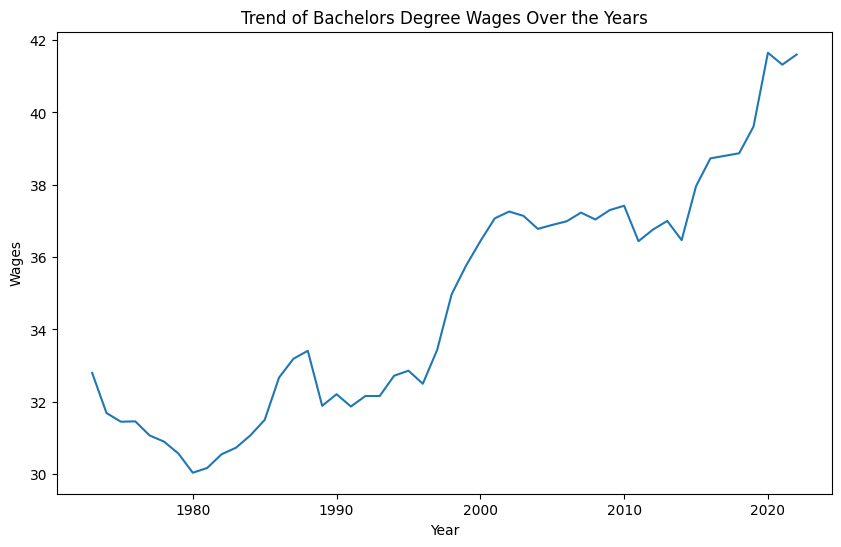

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Create a line plot to visualize the trend of 'Bachelors_Degree_Wages' over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Bachelors_Degree_Wages', data=df)
plt.title('Trend of Bachelors Degree Wages Over the Years')
plt.xlabel('Year')
plt.ylabel('Wages')
plt.show()


## **Conclusion:**

In this analysis, we successfully prepared the "College Wage Premium" dataset for further examination. Key steps included loading, ensuring data completeness, renaming columns for clarity, and performing basic data manipulations. The dataset is now ready for deeper analysis, visualization, and insights into the economic implications of education and wage disparities among different educational levels.